<a href="https://colab.research.google.com/github/anxosanchez/cheel/blob/main/Diagrama_P_x_y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
 from chemicals import CAS_from_any, Tb, Antoine

# Nueva sección

In [180]:
CAS1 = CAS_from_any('benzene')
CAS2 = CAS_from_any('toluene')

In [181]:
from chemicals.vapor_pressure import Psat_data_AntoinePoling

In [182]:
AC1 = Psat_data_AntoinePoling.loc[CAS1]
AC2 = Psat_data_AntoinePoling.loc[CAS2]
Tb1 = Tb(CAS1)
Tb2 = Tb(CAS2)  

In [183]:
print('A temperatura normal á que ferve o compoñente 1 é de {:5.3f} K ou {:5.3f} ºC.'.format(Tb1,Tb1 - 273.15))
print('A temperatura normal á que ferve o compoñente 2 é de {:5.3f} K ou {:5.3f} ºC.'.format(Tb2,Tb2 - 273.15))

A temperatura normal á que ferve o compoñente 1 é de 353.230 K ou 80.080 ºC.
A temperatura normal á que ferve o compoñente 2 é de 383.750 K ou 110.600 ºC.


In [184]:
# composición inicial zi
z = np.linspace(0,1,num=11)

In [185]:
def Psat1(T):
  return 10 ** ( AC1.A - AC1.B / ( T + AC1.C ) )

def Psat2(T):
  return 10 ** ( AC2.A - AC2.B / ( T + AC2.C ) )   

In [186]:
x = z
T = 115 +273.15 # K

In [187]:
P = x * Psat1(T) + ( 1 - x ) * Psat2(T)
y = x * Psat1(T)  / P

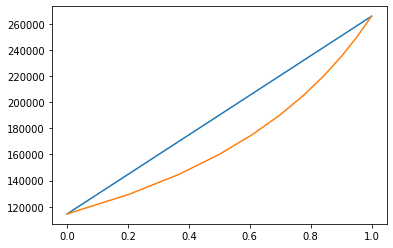

In [188]:
plt.plot(x,P,y,P)

In [189]:
P = 150000 
from scipy.optimize import fsolve

In [190]:
def fun1(T):
  return P - 10 ** ( AC1.A - AC1.B / ( T + AC1.C ) )

Tinf = fsolve(fun1,373)

In [191]:
def fun2(T):
  return P - 10 ** ( AC2.A - AC2.B / ( T + AC2.C ) )

Tsup = fsolve(fun2,373)

In [192]:
T = np.linspace(Tinf,Tsup)

In [193]:
x = ( P - Psat2(T) ) / ( Psat1(T) - Psat2(T) )

In [194]:
y = x * Psat1(T) / P

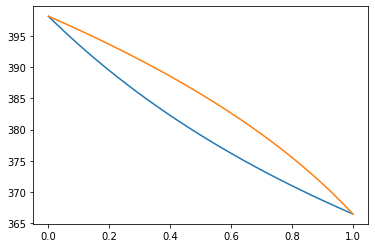

In [195]:
plt.plot(x,T,y,T)

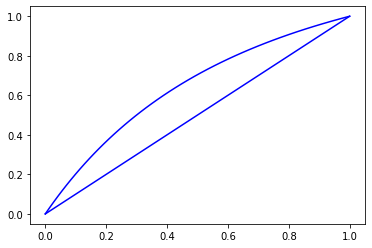

In [196]:
plt.plot(x,y,color='b')
plt.plot(x,x,color='b')
plt.show()

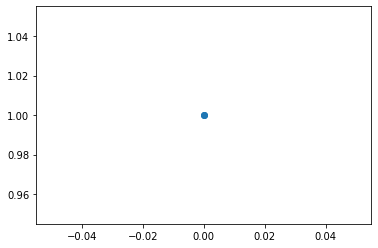

In [197]:
x1,y1 = [0,0],[1,1]
plt.plot(x1,y1,marker='o')